In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [22]:
img = Image.open('img.png')
print(f"Original image size: {img.size}")

Original image size: (920, 575)


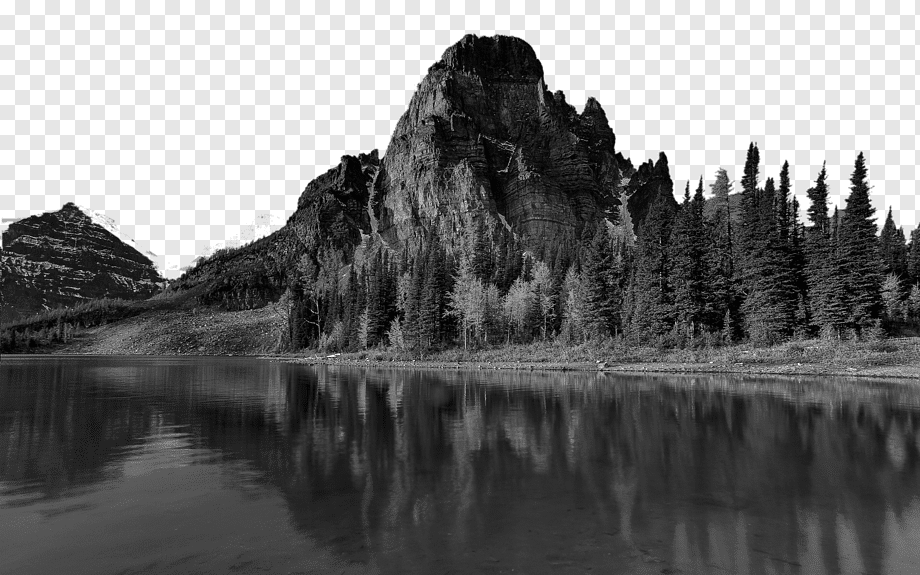

In [23]:
img

In [28]:
w, h = img.size
img = img.resize((w//4, h//4))
print(f"Resized image size: {img.size}")

Resized image size: (57, 35)


In [29]:
img_array = np.array(img, dtype=np.float32)
print(f"Image array shape: {img_array.shape}")

Image array shape: (35, 57, 4)


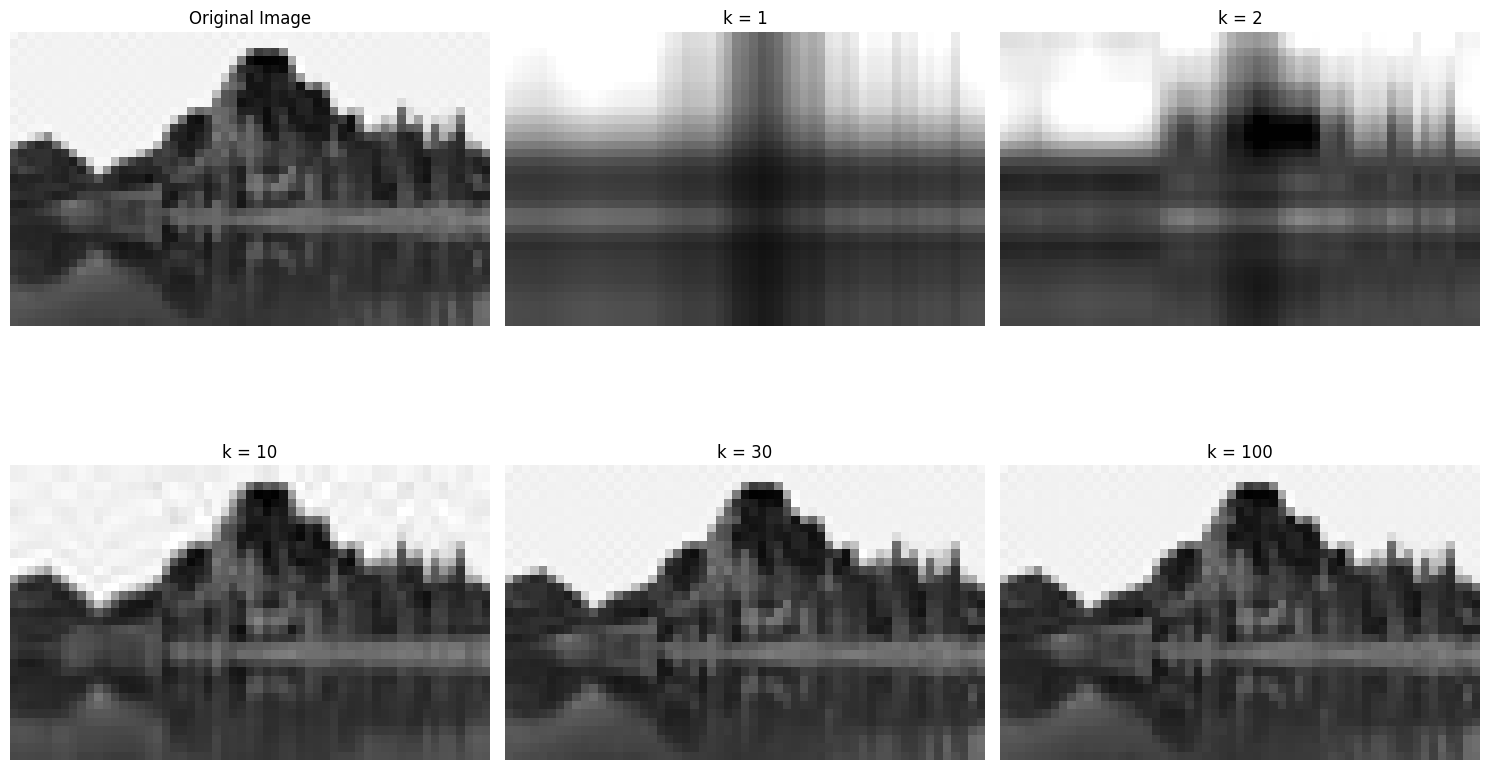

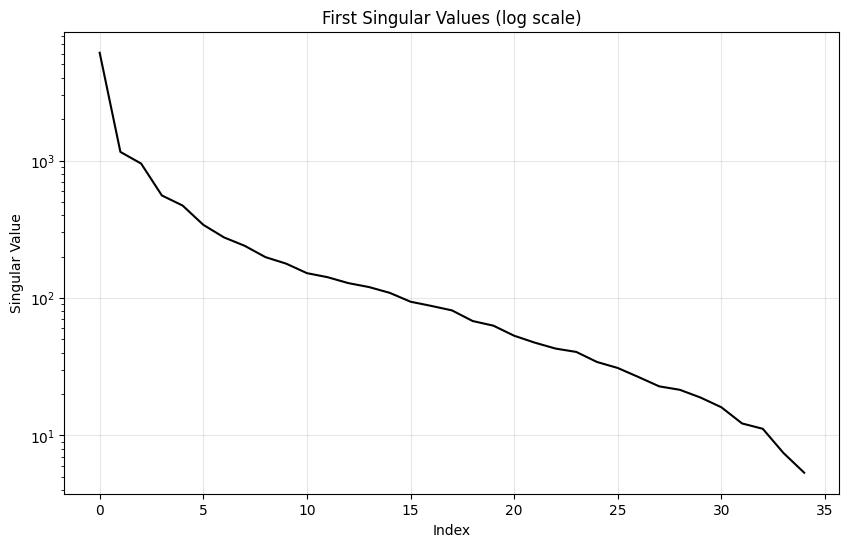

In [43]:
height, width, num_channels = img_array.shape
min_dim = min(height, width)


U_channels = []
S_channels = []
Vh_channels = []

for c in range(num_channels):

    U_c, S_c, Vh_c = np.linalg.svd(img_array[:, :, c], full_matrices=False)
    U_channels.append(U_c)
    S_channels.append(S_c)
    Vh_channels.append(Vh_c)

U = np.stack(U_channels, axis=-1)

S = np.stack(S_channels, axis=-1)

V_temp = np.zeros((num_channels, width, min_dim))
for c in range(num_channels):
    V_temp[c, :, :] = Vh_channels[c].T

V = V_temp

def reconstruct_image(U, S, V, k):

    height = U.shape[0]

    num_channels = U.shape[2]

    reconstructed_img = np.zeros((height, width, num_channels))

    for c in range(num_channels):
        # Извлекаем компоненты для текущего канала
        U_channel = U[:, :, c]
        S_channel = S[:, c]


        V_channel_T = V[c, :, :].T



        compressed_channel = U_channel[:, :k] @ np.diag(S_channel[:k]) @ V_channel_T[:k, :]
        reconstructed_img[:, :, c] = compressed_channel

    return reconstructed_img

k_values = [1, 2, 10, 30, 100]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img_array.astype(np.uint8))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for idx, k in enumerate(k_values, start=1):
    compressed_img = reconstruct_image(U, S, V, k)
    compressed_img = np.clip(compressed_img, 0, 255).astype(np.uint8)

    row = idx // 3
    col = idx % 3
    axes[row, col].imshow(compressed_img)
    axes[row, col].set_title(f'k = {k}')
    axes[row, col].axis('off')

    Image.fromarray(compressed_img).save(f'compressed_k{k}.png')

plt.tight_layout()
plt.show()

# Визуализация значений
plt.figure(figsize=(10, 6))
plt.semilogy(S[:min_dim, 0], 'k-')
plt.title('First Singular Values (log scale)')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True, alpha=0.3)
plt.show()

In [35]:
print("\n" + "="*50)
print("Compression Information:")
print("="*50)
print(f"Original array shape: {img_array.shape}")
print(f"Original array size in memory: {img_array.size * img_array.itemsize:,} bytes")



Compression Information:
Original array shape: (35, 57, 4)
Original array size in memory: 31,920 bytes
